In [1]:
import numpy as np
import matplotlib.pyplot as plt


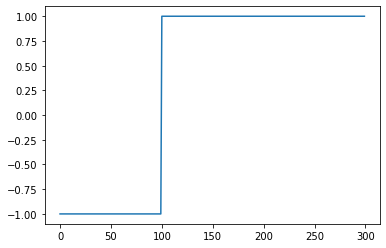

In [2]:
T = 100
A = 1
signalTime = np.arange(0, T*3, 1)
pulseHigh = np.full((T, 1), A)
pulseLow = np.full((T, 1), -A)
signal = np.ravel(np.concatenate((pulseLow, pulseHigh,   pulseHigh)))
plt.plot(signalTime, signal)
plt.show()


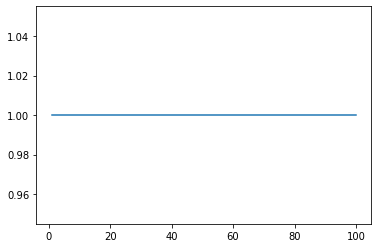

In [3]:
MF = pulseHigh
MFTime = np.arange(0, T, 1)
MFTime = -MFTime
MFTime = MFTime+T
plt.plot(MFTime, MF)
plt.show()


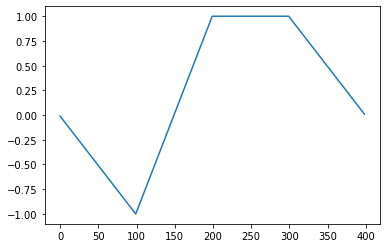

In [4]:
# Convolve the signal with the matched filter
convolved = np.convolve(np.ravel(signal), np.ravel(MF))/np.sum(MF)
plt.plot(np.arange(0,T*4-1,1), convolved)
plt.show()


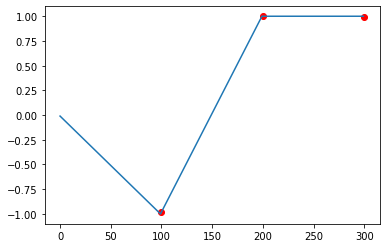

In [5]:
samplingInstance = np.arange(T, len(convolved), T)
signalSamples = convolved[samplingInstance]
plt.plot(signalTime, convolved[0:len(signal)])
plt.scatter(samplingInstance, signalSamples, color='red')
plt.show()


## Part 2

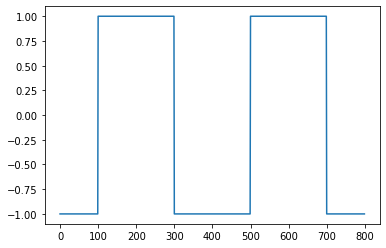

In [6]:
T = 100
NUMBER_OF_PULSES = 8
A = 1
signalTime = np.arange(0, T*NUMBER_OF_PULSES, 1)
pulseHigh = np.full((T, 1), A)
pulseLow = np.full((T, 1), -A)
signal = np.ravel(np.concatenate((pulseLow,  pulseHigh, pulseHigh, pulseLow,pulseLow,  pulseHigh, pulseHigh, pulseLow)))
plt.plot(signalTime, signal)
plt.show()


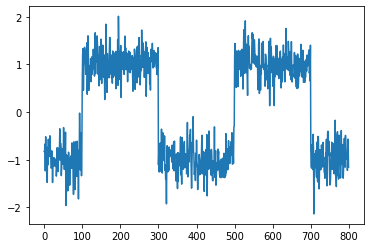

In [7]:
signal_power = signal**2
target_snr_db = 10
sig_avg_watts = np.mean(signal_power)
sig_avg_db = 10 * np.log10(sig_avg_watts)
noise_avg_db = sig_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
mean_noise = 0
noise = np.random.normal(
    mean_noise, np.sqrt(noise_avg_watts), len(signal_power))

signal = signal + noise
plt.plot(signalTime, signal)
plt.show()


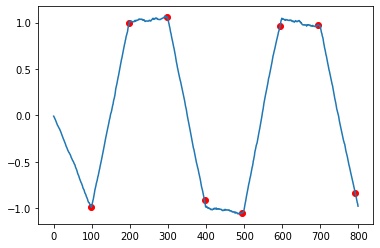

In [8]:
# filter one
filterMatched = np.ones((T, 1))
convolved = np.convolve(np.ravel(signal), np.ravel(filterMatched))/np.sum(filterMatched)
samplingInstance = np.arange(T-1, len(signal), T-1)
signalSamples = convolved[samplingInstance]
plt.plot(signalTime, convolved[0:len(signal)])
plt.scatter(samplingInstance, signalSamples, color='red')
plt.show()

In [9]:
# calculate bit error rate
Error = np.sum(np.abs(np.round(signalSamples))) - signal[samplingInstance]
BER = np.sum(Error) / len(Error)
print(BER)

7.822056878223607


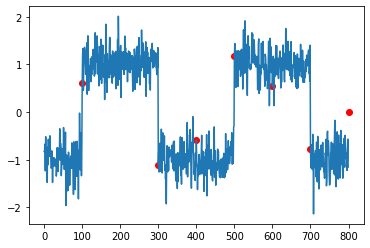

In [10]:
# filter one
filterImpulse = np.zeros((T, 1))
filterImpulse[0] = 1
convolved = np.convolve(np.ravel(signal), np.ravel(filterImpulse))/np.sum(filterImpulse)
samplingInstance = np.arange(T, len(convolved), T)
signalSamples = convolved[samplingInstance]
plt.plot(signalTime, convolved[0:len(signal)])
plt.scatter(samplingInstance, signalSamples, color='red')
plt.show()

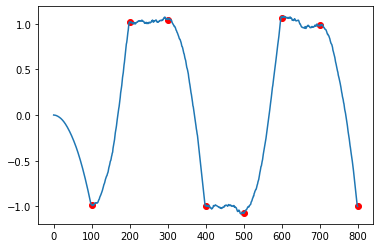

In [11]:
# filter one
filterTriangle = np.sqrt(3) * signalTime[1: T]
convolved = np.convolve(np.ravel(signal), np.ravel(filterTriangle))/np.sum(filterTriangle)
samplingInstance = np.arange(T, len(convolved), T)
signalSamples = convolved[samplingInstance]
plt.plot(signalTime, convolved[0:len(signal)])
plt.scatter(samplingInstance, signalSamples, color='red')
plt.show()

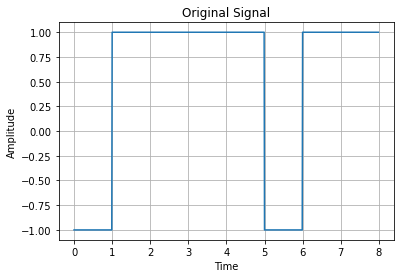

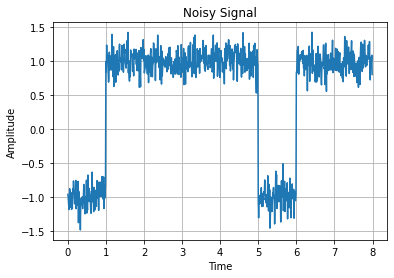

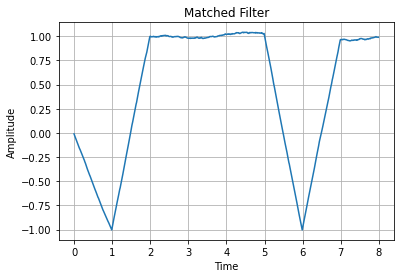

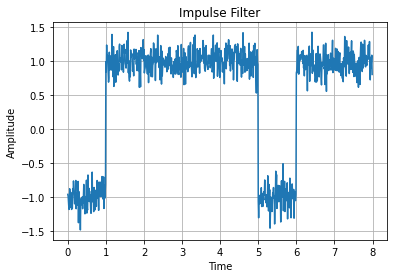

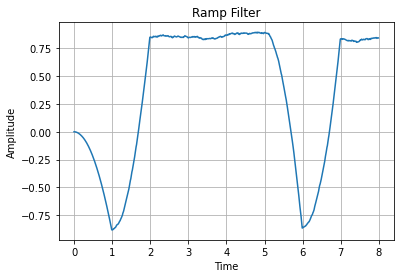

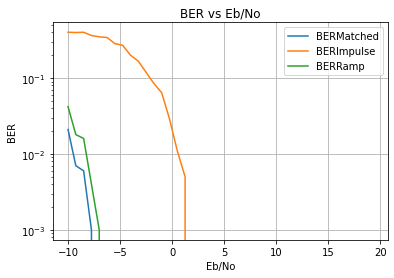

In [12]:
# import os

# # If folder does not exist, create it
# if not os.path.exists("./Figures"):
#     os.makedirs("./Figures")


def graph(x, y, title):
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid()
    # plt.savefig("./Figures/"+title)
    plt.show()


def thresh(ip, t):
    return np.where(ip > t, 1, 0)


def sample(inputSignal, sampleRate, sampleSize):
    samples = []
    for i in range(inputSignal.shape[0]//(sampleRate*sampleSize)):
        samples.append(inputSignal[(i+1)*sampleRate*sampleSize-1])
    return np.array(samples)


def bitStreamToSignal(bitStream, numberOfSamplesInBit, amplitude):
    signal = np.array([])
    for i in bitStream:
        if i == 0:
            signal = np.append(signal, np.full(
                numberOfSamplesInBit, -amplitude))
        else:
            signal = np.append(signal, np.full(
                numberOfSamplesInBit, amplitude))
    return signal


amplitude = 1
bitEnergy = 1
numberOfBits = 1000  # number of bits to be transmitted
T = 1  # Time
fs = 100  # Sampling frequency
time = np.arange(0, T*numberOfBits, 1/fs)
numberOfSamplesInBit = time.shape[0]//numberOfBits

# Filters Creation
unityFilter = np.ones(numberOfSamplesInBit)
impulseFilter = np.zeros(numberOfSamplesInBit)
impulseFilter[0] = 1
rampFilter = np.sqrt(3) * time[0:numberOfSamplesInBit]

iterations = 40

PeMatchedF = np.zeros(iterations)  # Probability of error for matched filter
PeImpulseF = np.zeros(iterations)  # Probability of error for impulse filter
PeRampF = np.zeros(iterations)  # Probability of error for Ramp filter

BERMatched = np.zeros(iterations)  # Bit error rate for matched filter
BERImpulse = np.zeros(iterations)  # Bit error rate for impulse filter
BERRamp = np.zeros(iterations)  # Bit error rate for Ramp filter

snrs = np.arange(-10, 20, 30/iterations)

for iteration, snr in enumerate(snrs):
    # Bit stream generation
    bitStream = np.random.choice([0, 1], size=numberOfBits)

    # Transmitter Probabilities
    numOfSentOnes = np.sum(bitStream)
    numOfSentZeros = numberOfBits - numOfSentOnes
    probabilityOfSendin1 = numOfSentOnes / numberOfBits
    probabilityOfSending0 = 1 - probabilityOfSendin1

    # Bits to Pulses
    signal = bitStreamToSignal(bitStream, numberOfSamplesInBit, amplitude)

    # Channel simulation (Add noise)
    noiseEnergy = bitEnergy / (10**(snr / 10))
    noise = np.random.normal(0, noiseEnergy/2, signal.shape[0])
    noisy_signal = signal + noise

    # Filtering
    convMatched = np.convolve(noisy_signal, unityFilter)/(fs)
    convImpulse = np.convolve(noisy_signal, impulseFilter)
    convRamp = np.convolve(noisy_signal, rampFilter)/(fs)

    # For one time only, plot output of all filters
    if (iteration == 20):
        limit = 800
        graph(time[:limit], signal[:limit], "Original Signal")
        graph(time[:limit], noisy_signal[:limit], "Noisy Signal")
        graph(time[:limit], convMatched[:limit], "Matched Filter")
        graph(time[:limit], convImpulse[:limit], "Impulse Filter")
        graph(time[:limit], convRamp[:limit], "Ramp Filter")

    # Sampling
    samplesMatched = sample(convMatched, fs, T)
    samplesImpulse = sample(convImpulse, fs, T)
    samplesRamp = sample(convRamp, fs, T)

    # Calculating Optimal Lambda
    lambdaa = np.log(probabilityOfSending0 /
                     probabilityOfSendin1)*noiseEnergy/(4*T*amplitude)

    # Thresholding
    outputMatched = thresh(samplesMatched, lambdaa)
    outputImpulse = thresh(samplesImpulse, lambdaa)
    outputRamp = thresh(samplesRamp, lambdaa)

    # Calculating probability of error
    # Probability of error =
    #   probability of 1 * probability of error given 1
    #   + probability of 0 * probability of error given 0
    matchedMiss = outputMatched[outputMatched != bitStream]
    # probability of error given 1
    p1g0_matched = matchedMiss[matchedMiss == 1].shape[0]/numOfSentZeros
    # probability of error given 0
    p0g1_matched = matchedMiss[matchedMiss == 0].shape[0]/numOfSentOnes
    PeMatchedF[iteration] = probabilityOfSendin1 * \
        p0g1_matched + probabilityOfSending0 * p1g0_matched

    impulseMiss = outputImpulse[outputImpulse != bitStream]
    p1g0_impulse = impulseMiss[impulseMiss == 1].shape[0]/numOfSentZeros
    p0g1_impulse = impulseMiss[impulseMiss == 0].shape[0]/numOfSentOnes
    PeImpulseF[iteration] = probabilityOfSendin1 * \
        p0g1_impulse + probabilityOfSending0 * p1g0_impulse

    rampMiss = outputRamp[outputRamp != bitStream]
    p1g0_ramp = rampMiss[rampMiss == 1].shape[0]/numOfSentZeros
    p0g1_ramp = rampMiss[rampMiss == 0].shape[0]/numOfSentOnes
    PeRampF[iteration] = probabilityOfSendin1 * \
        p0g1_ramp + probabilityOfSending0 * p1g0_ramp

    # bit error rate = number of wrong bits / total number of bits
    BERMatched[iteration] = matchedMiss.shape[0] / numberOfBits
    BERImpulse[iteration] = impulseMiss.shape[0] / numberOfBits
    BERRamp[iteration] = rampMiss.shape[0] / numberOfBits


plt.semilogy(snrs, BERMatched, label="BERMatched",)
plt.semilogy(snrs, BERImpulse, label="BERImpulse",)
plt.semilogy(snrs, BERRamp, label="BERRamp",)
plt.xlabel("Eb/No")
plt.ylabel("BER")
plt.title("BER vs Eb/No")
plt.legend()
plt.grid()
# plt.savefig("./Figures/BER vs SNR")
plt.show()